# Jawablah poin-poin assignment berikut
#### perhatikan dengan baik apa yang diminta pada soal

# 1. Anda bekerja sebagai seorang data scientist, atasan anda mengirimkan anda data kepada anda dan meminta untuk memberikan analisa dengan menggunakan semua metode pada data manipulation berikut :
- a. Filtering
- b. Sorting
- c. Grouping / Aggregasi
- d. Join / Merging
- e. Pivot
- f. Crosstab
- g. Appending
- h. Mengeksplor terkait dengan operasi pada Datetime (week, day, dan sebagainya)
### Notes : Sebelum menjawab permintaan diatas, pertama-tama awali dengan mengajukan pertanyaan analisa terlebih dahulu dan tulis insight dari yang anda dapat, **pertanyaan analisa dilakukan pada semua metode data manipulation diatas**

# **mohon maaf mentor, banyak tambahan code dan analisis, saya hanya menambahkan untuk bahan belajar saya saja, Terima Kasih**

#**Dan untuk setiap pertanyaanya sudah saya bold**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# --- Data Manipulation ----
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

#--- Numerical Computation ----
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/supermarket_sales.csv")

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**Note :**
sebelum melakukan manipulasi pada data yang dimiliki, langkah pertama yang krusial adalah memahami data yang dimiliki.

In [ ]:
#--- data understanding ---
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.nunique()

,0
Invoice ID,1000
Branch,3
City,3
Customer type,2
Gender,2
Product line,6
Unit price,943
Quantity,10
Tax 5%,990
Total,990


In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
for col in df.columns:
  print(f'===={col}====')
  display(df[col].value_counts())

====Invoice ID====


,count
Invoice ID,
849-09-3807,1
750-67-8428,1
226-31-3081,1
631-41-3108,1
123-19-1176,1
373-73-7910,1
699-14-3026,1
355-53-5943,1
148-41-7930,1


====Branch====


,count
Branch,
A,340
B,332
C,328


====City====


,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


====Customer type====


,count
Customer type,
Member,501
Normal,499


====Gender====


,count
Gender,
Female,501
Male,499


====Product line====


,count
Product line,
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


====Unit price====


,count
Unit price,
83.77,3
84.05,2
60.30,2
64.08,2
19.15,2
73.47,2
78.31,2
95.54,2
89.48,2


====Quantity====


,count
Quantity,
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90


====Tax 5%====


,count
Tax 5%,
4.4640,2
10.3635,2
12.5700,2
9.0045,2
4.1540,2
13.1880,2
8.3770,2
39.4800,2
10.3260,2


====Total====


,count
Total,
93.7440,2
217.6335,2
263.9700,2
189.0945,2
87.2340,2
276.9480,2
175.9170,2
829.0800,2
216.8460,2


====Date====


,count
Date,
2/7/2019,20
2/15/2019,19
3/2/2019,18
1/8/2019,18
3/14/2019,18
1/25/2019,17
3/5/2019,17
1/26/2019,17
1/23/2019,17


====Time====


,count
Time,
19:48,7
14:42,7
17:38,6
17:36,5
19:39,5
17:16,5
11:40,5
10:11,5
19:30,5


====Payment====


,count
Payment,
Ewallet,345
Cash,344
Credit card,311


====cogs====


,count
cogs,
89.28,2
207.27,2
251.40,2
180.09,2
83.08,2
263.76,2
167.54,2
789.60,2
206.52,2


====gross margin percentage====


,count
gross margin percentage,
4.761905,1000


====gross income====


,count
gross income,
4.4640,2
10.3635,2
12.5700,2
9.0045,2
4.1540,2
13.1880,2
8.3770,2
39.4800,2
10.3260,2


====Rating====


,count
Rating,
6.0,26
6.6,24
9.5,22
4.2,22
5.1,21
6.5,21
8.0,21
5.0,21
6.2,21


Untuk memudahkan dalam analisis saya membagi nilai Unit Price kedalam 4 kelas kategori yaitu :

| Kategori | Rentang Unit Price |
| -------- | ------------------ |
| Ekonomis | 0 – 25             |
| Menengah | >25 – 50           |
| Mahal    | >50 – 75           |
| Premium  | >75 – 100          |



Kemudian saya akan Fokus mencari pada transaksi produk premium dalam jumlah banyak

Insightnya supaya bisa menunjukkan pelanggan besar yang membeli produk premium.



## **Filtering**

**Apa saja transaksi dengan Unit price di atas 75 dan Quantity lebih dari 5?**

In [ ]:
df['Quantity'].unique()

array([ 7,  5,  8,  6, 10,  2,  3,  4,  1,  9])

In [ ]:
# a. Filtering - cari transaksi produk premium (Unit price > 75, Quantity > 5)
filtered_df = df[(df['Unit price'] > 75) & (df['Quantity'] > 5)]
print("Jumlah transaksi produk premium (Unit price >75, Quantity >5):", len(filtered_df))

# Menampilkan semua kolom
display(filtered_df.head())

Jumlah transaksi produk premium (Unit price >75, Quantity >5): 148


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5
31,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9,35.1315,737.7615,1/28/2019,12:43,Cash,702.63,4.761905,35.1315,4.5
32,640-49-2076,B,Mandalay,Normal,Male,Sports and travel,83.78,8,33.5120,703.7520,1/10/2019,14:49,Cash,670.24,4.761905,33.5120,5.1


In [ ]:
# a. Filtering - cari transaksi produk premium (Unit price > 75, Quantity > 5)
filtered_df = df[(df['Unit price'] > 75) & (df['Quantity'] > 5)]
print("Jumlah transaksi produk premium (Unit price >75, Quantity >5):", len(filtered_df))
display(filtered_df[['Invoice ID','Branch','Product line','Unit price','Quantity','Total']].head())

Jumlah transaksi produk premium (Unit price >75, Quantity >5): 148


,Invoice ID,Branch,Product line,Unit price,Quantity,Total
4,373-73-7910,A,Sports and travel,86.31,7,634.3785
5,699-14-3026,C,Electronic accessories,85.39,7,627.6165
15,299-46-1805,B,Sports and travel,93.72,6,590.4360
31,149-71-6266,B,Sports and travel,78.07,9,737.7615
32,640-49-2076,B,Sports and travel,83.78,8,703.7520


Melakukan filtering atau penyaringan data untuk mencari transaksi produk premium, yaitu:

Harga satuan (Unit price) > 75, dan

Jumlah barang (Quantity) > 5

Segmentasi Produk Premium:
Transaksi yang memenuhi kriteria ini mengindikasikan adanya pelanggan yang bersedia membeli produk mahal dalam jumlah banyak, yang bisa menjadi target market khusus (misalnya: pelanggan korporat, reseller, dsb).

Peluang Strategi Penjualan:

Bisa dilakukan loyalty program atau diskon khusus untuk pelanggan yang sering melakukan pembelian premium.

Toko dapat fokus pada studi perilaku pelanggan yang melakukan pembelian premium ini untuk mengoptimalkan pemasaran.




## **Sorting**

In [ ]:
filtered_df['Unit price'].value_counts()

,count
Unit price,
98.70,2
99.96,2
87.87,2
86.31,1
85.39,1
83.78,1
82.63,1
78.07,1
93.72,1


Insight
dari data diatas terlihat bahwa jumlah penjualan produk premium dengan pembelian lebih dari 5, pada bulan 1 tahun 2019

**Transaksi pelanggan vip mana yang membeli 10 produk dengan unit price tertinggi?**

In [ ]:
# Mengurutkan berdasarkan total penjualan secara menurun
penjualan_terurut = filtered_df.sort_values(by='Total', ascending=False)
penjualan_terurut.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.65,1042.65,2/15/2019,14:53,Credit card,993.0,4.761905,49.65,6.6
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.49,1039.29,2/8/2019,16:20,Credit card,989.8,4.761905,49.49,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.26,1034.46,1/30/2019,20:23,Ewallet,985.2,4.761905,49.26,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.75,1023.75,1/12/2019,16:18,Ewallet,975.0,4.761905,48.75,8.0
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.69,1022.49,3/2/2019,17:16,Ewallet,973.8,4.761905,48.69,4.4


Mengurutkan transaksi produk premium berdasarkan nilai total penjualan terbesar ke terkecil.

dari data diatas penjualan tertinggi dengan unit price 99.30 dan pembeliannya 10 terletak di id 350, customer wanita yang tinggal di kota Naypytaw, produk yang dibelinya adalah produk fashion Accesoris, jumlah yang produk yang dibelinya sebanyak 10 buah, pada tahun 2019 mennggunakan credit card.

In [ ]:
# Sorting - rata-rata Total per Product line
filtered_df.groupby('Branch')['Quantity'].agg(['max','min','count']).reset_index()

,Branch,max,min,count
0,A,10,6,41
1,B,10,6,52
2,C,10,6,55


Dapat kita lihat customer yang membeli produk 10 buah terbanyak ada di cabang C dengan jumlah customer 55 orang, kemudian disusul oleh cabang B sebanyak 52 customer, kemudian yang terakhir cabang C. dari data diatas bisa kita jadikan acuan untuk memberikan nya loyalty progam ataupun diskon, spaya pelanggan bisa terus menjadi member.

In [ ]:
filtered_df.groupby('Branch')['Quantity'].agg(['max','min','count']).reset_index().sort_values(by='count', ascending=True)
# descending -> besar ke kecil (True)
# ascending -> kecil ke besar (True)
# ascending False = Descending
# Descending False = Ascending

,Branch,max,min,count
0,A,10,6,41
1,B,10,6,52
2,C,10,6,55


Mengurutkan hasil sebelumnya berdasarkan jumlah transaksi premium terkecil hingga terbesar.

In [ ]:
group_branch = filtered_df.groupby('Branch')['Quantity'].agg(['max','min','count']).reset_index()

In [ ]:
group_branch.sort_values(by='count', ascending=True)

,Branch,max,min,count
0,A,10,6,41
1,B,10,6,52
2,C,10,6,55


In [ ]:
filtered_df.groupby('Product line')['Quantity'].agg(['max','min','count']).reset_index().sort_values(by='Product line', ascending=False)

,Product line,max,min,count
5,Sports and travel,10,6,28
4,Home and lifestyle,10,6,27
3,Health and beauty,10,6,22
2,Food and beverages,10,6,24
1,Fashion accessories,10,6,21
0,Electronic accessories,10,6,26


Mengelompokkan data berdasarkan Product line dan mengurutkannya berdasarkan nama produk secara menurun (Z-A).

In [ ]:
filtered_df.groupby('Branch')['Quantity'].agg(['max','min','count']).sort_values(by='count', ascending=False).reset_index()

,Branch,max,min,count
0,C,10,6,55
1,B,10,6,52
2,A,10,6,41


Sama dengan analisis Branch sebelumnya, namun kali ini diurutkan berdasarkan jumlah transaksi tertinggi ke terendah.

> **Insight:**
Menunjukkan cabang dengan jumlah transaksi premium terbanyak dan Membantu memetakan lokasi strategis untuk menjual produk mahal dalam jumlah banyak.

In [ ]:
# Sorting
monthly_avg = filtered_df.groupby(filtered_df['Date']).Total.mean().reset_index().sort_values(by='Total', ascending=False)
monthly_avg.head()

,Date,Total
18,1/30/2019,1034.4600
13,1/25/2019,950.2500
63,3/30/2019,918.7290
3,1/12/2019,899.5035
61,3/29/2019,893.6025


## **Grouping**

**Bagaimana performa penjualan produk premium di setiap cabang, dan bagaimana performa cabang yang tertinggi penjualanya?**

In [ ]:
q90 = df['Quantity'].quantile(0.9)
grouped = df[df['Quantity'] > q90].groupby('Product line')['Quantity'].agg(['count','mean'])
grouped

,count,mean
Product line,,


In [ ]:
filtered_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5
31,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9,35.1315,737.7615,1/28/2019,12:43,Cash,702.63,4.761905,35.1315,4.5
32,640-49-2076,B,Mandalay,Normal,Male,Sports and travel,83.78,8,33.5120,703.7520,1/10/2019,14:49,Cash,670.24,4.761905,33.5120,5.1


In [ ]:
filtered_df_grouped = filtered_df.groupby('Branch')['Total'].sum().reset_index()
filtered_df_grouped

,Branch,Total
0,A,30100.308
1,B,38162.817
2,C,42785.988



Terlihat cabang C dengan total penjualan (termasuk pajak) terbanyak


In [ ]:
filtered_df_a = filtered_df[filtered_df['Branch'] == 'C']
filtered_df_a.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
43,228-96-1411,C,Naypyitaw,Member,Female,Food and beverages,98.70,8,39.4800,829.0800,3/4/2019,20:39,Cash,789.60,4.761905,39.4800,7.6
49,574-22-5561,C,Naypyitaw,Member,Female,Fashion accessories,82.63,10,41.3150,867.6150,3/19/2019,17:08,Ewallet,826.30,4.761905,41.3150,7.9
50,326-78-5178,C,Naypyitaw,Member,Male,Food and beverages,91.40,7,31.9900,671.7900,2/3/2019,10:19,Cash,639.80,4.761905,31.9900,9.5
55,399-46-5918,C,Naypyitaw,Normal,Female,Electronic accessories,85.98,8,34.3920,722.2320,2/28/2019,19:01,Cash,687.84,4.761905,34.3920,8.2


## **Join/Merging**

**Siapa manajer cabang yang paling banyak menangani transaksi produk premium?**

In [ ]:
# Dataset detail cabang
detail_cabang = pd.DataFrame({
    'Branch': ['A', 'B', 'C'],
    'Manager': ['Madan', 'jhoe', 'Rendi']
})
detail_cabang

,Branch,Manager
0,A,Madan
1,B,jhoe
2,C,Rendi


Dari data sebelumnya bahwa cabang C adalah cabang dengan penjualan terbaik di produk premium dan pelanggannya adalah pelanggan yang loyal, manajernya adalah Rendi.
kemudian kita bisa lihat performa rendi pada data frame selanjutnya

In [ ]:
# Join: Menggabungkan data penjualan dengan data cabang
filtered_df_joined = pd.merge(filtered_df, detail_cabang, on='Branch', how='inner')

filtered_df_joined.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Manager
0,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Madan
1,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,Rendi
2,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5,jhoe
3,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9,35.1315,737.7615,1/28/2019,12:43,Cash,702.63,4.761905,35.1315,4.5,jhoe
4,640-49-2076,B,Mandalay,Normal,Male,Sports and travel,83.78,8,33.5120,703.7520,1/10/2019,14:49,Cash,670.24,4.761905,33.5120,5.1,jhoe


Menggabungkan transaksi produk premium dengan informasi nama manajer cabang.

how='inner' memastikan hanya data transaksi yang punya kecocokan Branch di kedua DataFrame yang disertakan.

In [ ]:
filtered_df_joined[filtered_df_joined['Manager'] == 'Rendi']

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Manager
1,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,Rendi
5,228-96-1411,C,Naypyitaw,Member,Female,Food and beverages,98.70,8,39.4800,829.0800,3/4/2019,20:39,Cash,789.60,4.761905,39.4800,7.6,Rendi
6,574-22-5561,C,Naypyitaw,Member,Female,Fashion accessories,82.63,10,41.3150,867.6150,3/19/2019,17:08,Ewallet,826.30,4.761905,41.3150,7.9,Rendi
7,326-78-5178,C,Naypyitaw,Member,Male,Food and beverages,91.40,7,31.9900,671.7900,2/3/2019,10:19,Cash,639.80,4.761905,31.9900,9.5,Rendi
8,399-46-5918,C,Naypyitaw,Normal,Female,Electronic accessories,85.98,8,34.3920,722.2320,2/28/2019,19:01,Cash,687.84,4.761905,34.3920,8.2,Rendi
12,393-65-2792,C,Naypyitaw,Normal,Male,Food and beverages,89.48,10,44.7400,939.5400,1/6/2019,12:46,Credit card,894.80,4.761905,44.7400,9.6,Rendi
13,841-35-6630,C,Naypyitaw,Normal,Female,Electronic accessories,75.91,6,22.7730,478.2330,3/9/2019,18:21,Cash,455.46,4.761905,22.7730,8.7,Rendi
14,829-49-1914,C,Naypyitaw,Member,Female,Food and beverages,78.31,10,39.1550,822.2550,3/5/2019,16:24,Ewallet,783.10,4.761905,39.1550,6.6,Rendi
15,870-72-4431,C,Naypyitaw,Normal,Female,Health and beauty,99.19,6,29.7570,624.8970,1/21/2019,14:42,Credit card,595.14,4.761905,29.7570,5.5,Rendi
16,730-50-9884,C,Naypyitaw,Normal,Female,Sports and travel,83.06,7,29.0710,610.4910,3/5/2019,14:31,Ewallet,581.42,4.761905,29.0710,4.0,Rendi


Menampilkan hanya transaksi produk premium di cabang C, yang dikelola oleh Rendi.

In [ ]:
merge_cabang = pd.merge(detail_cabang,filtered_df, on='Branch', how='left')
merge_cabang

,Branch,Manager,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Madan,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
1,A,Madan,635-40-6220,Yangon,Normal,Male,Health and beauty,89.60,8,35.8400,752.6400,2/7/2019,11:28,Ewallet,716.80,4.761905,35.8400,6.6
2,A,Madan,232-11-3025,Yangon,Normal,Male,Sports and travel,78.77,10,39.3850,827.0850,1/24/2019,10:04,Cash,787.70,4.761905,39.3850,6.4
3,A,Madan,704-48-3927,Yangon,Member,Male,Electronic accessories,88.67,10,44.3350,931.0350,1/12/2019,14:50,Ewallet,886.70,4.761905,44.3350,7.3
4,A,Madan,638-60-7125,Yangon,Normal,Female,Electronic accessories,99.56,8,39.8240,836.3040,2/14/2019,17:03,Credit card,796.48,4.761905,39.8240,5.2
5,A,Madan,668-90-8900,Yangon,Normal,Female,Home and lifestyle,93.69,7,32.7915,688.6215,3/10/2019,18:44,Credit card,655.83,4.761905,32.7915,4.5
6,A,Madan,802-70-5316,Yangon,Member,Female,Sports and travel,92.13,6,27.6390,580.4190,3/6/2019,20:34,Cash,552.78,4.761905,27.6390,8.3
7,A,Madan,239-10-7476,Yangon,Normal,Female,Home and lifestyle,77.95,6,23.3850,491.0850,1/21/2019,16:37,Ewallet,467.70,4.761905,23.3850,8.0
8,A,Madan,746-94-0204,Yangon,Normal,Male,Fashion accessories,83.24,9,37.4580,786.6180,1/29/2019,11:56,Credit card,749.16,4.761905,37.4580,7.4
9,A,Madan,687-47-8271,Yangon,Normal,Male,Fashion accessories,98.98,10,49.4900,1039.2900,2/8/2019,16:20,Credit card,989.80,4.761905,49.4900,8.7


## **Pivot**

**Bagaimana perbandingan total penjualan untuk setiap lini produk di masing-masing cabang?**

In [ ]:
filtered_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5
31,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9,35.1315,737.7615,1/28/2019,12:43,Cash,702.63,4.761905,35.1315,4.5
32,640-49-2076,B,Mandalay,Normal,Male,Sports and travel,83.78,8,33.5120,703.7520,1/10/2019,14:49,Cash,670.24,4.761905,33.5120,5.1


In [ ]:
pd.pivot_table(filtered_df, index='Product line',  columns='Branch', values='Total')
# secara umum kalo ga ada aggfunc maka yg dihitung ialah rata-rata values
# ref : https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

Branch,A,B,C
Product line,,,
Electronic accessories,762.163500,724.390800,728.827167
Fashion accessories,762.912937,695.465750,880.629000
Food and beverages,684.754000,740.040000,823.008750
Health and beauty,690.784500,740.802300,700.810950
Home and lifestyle,718.977000,784.406700,741.292500
Sports and travel,747.749625,711.155375,792.857625


Interpretasi:

Menampilkan total penjualan produk premium berdasarkan Product line dan Branch.

Kita bisa lihat barang yang paling laku pada tiap cabang, untuk produk Electronic accessories paling laku di cabang A dengan total 762.163,
Fashion accessories terlaris di cabang C dengan total 880.629,
Food and beverages terlaris di cabang C dengan total 823.008,
Health and beauty terlaris di cabang B dengan total 740.802,
Home and lifestyle terlaris di cabang B dengan total 784.406 dan
Sports and travel	terlaris di cabang C 792.857


Insight:

Cabang yang memiliki nilai tertinggi untuk suatu Product line bisa dianggap fokus atau unggul dalam menjual produk tersebut.


Kita bisa melihat apakah pelanggan pria atau wanita lebih dominan membeli produk premium jenis tertentu di suatu cabang.

Misalnya, jika di Branch C, wanita mendominasi pembelian produk Health and beauty, maka itu bisa jadi target pasar potensial.

In [ ]:
tabel_pivot_morethan_2_category = pd.pivot_table(filtered_df, values='Total', index=['Product line','Gender'], columns='Branch', aggfunc='sum')
tabel_pivot_morethan_2_category

Branch                                 A          B          C
Product line           Gender                                 
Electronic accessories Female  2991.8070  3062.1465  3498.2535
                       Male    2343.3375  4181.7615  3061.1910
Fashion accessories    Female  2827.3035  2076.0390  3649.7265
                       Male    3276.0000  2096.7555  2514.6765
Food and beverages     Female  1785.0420  2960.1600  8159.8125
                       Male    2323.4820        NaN  3362.3100
Health and beauty      Female        NaN  2473.0755  2348.0730
                       Male    1381.5690  4934.9475  4660.0365
Home and lifestyle     Female  5808.0540  5905.0530  3161.7075
                       Male    1381.7160  1939.0140  2027.3400
Sports and travel      Female  2224.8450  3657.6330  4703.1915
                       Male    3757.1520  4876.2315  1639.6695

Interpretasi:

Menunjukkan total penjualan produk premium yang dilakukan oleh pria dan wanita di setiap cabang.

Insight:

Bisa dibandingkan apakah pelanggan pria atau wanita lebih dominan di cabang tertentu.

Misalnya: Branch B mungkin memiliki total penjualan lebih tinggi dari pelanggan pria → strategi promosi bisa disesuaikan.



In [ ]:
pd.pivot_table(filtered_df, values='Total', columns='Gender', index='Branch', aggfunc='sum')

Gender,Female,Male
Branch,,
A,15637.0515,14463.2565
B,20134.1070,18028.7100
C,25520.7645,17265.2235


dari tabel diatas untuk penjualan berdasarkan cabang yang dipisahkan menjadi dua kategori jenis kelamin yaitu wanita dan pria. Dapat dilihat bahwa total penjualan tertinggi untuk kategori pria ada di cabang B dan untuk wanita ada di cabang C

In [ ]:
tabel_pivot_morethan_2_category = pd.pivot_table(filtered_df, values=['Total','Quantity'], index='Gender', columns='Branch', aggfunc='sum')
tabel_pivot_morethan_2_category

Quantity                 Total                       
Branch        A    B    C           A          B           C
Gender                                                      
Female      164  220  276  15637.0515  20134.107  25520.7645
Male        157  197  184  14463.2565  18028.710  17265.2235

Produk Premium Populer:

Beberapa product line lebih sering dibeli sebagai produk premium, bisa jadi karena marginnya tinggi atau promosi.

Dominasi Cabang:

Cabang tertentu lebih aktif menjual produk premium (misalnya Cabang C), bisa mencerminkan efektivitas tim atau strategi lokal.

Gender Preference:

Pola pembelian produk premium bervariasi berdasarkan jenis kelamin dan cabang.

Penting untuk menyusun promosi berbasis segmentasi gender dan lokasi.

Peluang Optimalisasi:

Cabang dengan penjualan rendah pada segmen tertentu bisa ditingkatkan melalui pelatihan, bundling, atau diskon.

## **Crosstab**

**Bagaimana distribusi metode pembayaran yang digunakan oleh pelanggan di masing-masing cabang?**

In [ ]:
filtered_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5
31,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9,35.1315,737.7615,1/28/2019,12:43,Cash,702.63,4.761905,35.1315,4.5
32,640-49-2076,B,Mandalay,Normal,Male,Sports and travel,83.78,8,33.5120,703.7520,1/10/2019,14:49,Cash,670.24,4.761905,33.5120,5.1


In [ ]:
filtered_df['Invoice ID'].value_counts()

,count
Invoice ID,
373-73-7910,1
699-14-3026,1
299-46-1805,1
149-71-6266,1
640-49-2076,1
228-96-1411,1
574-22-5561,1
326-78-5178,1
399-46-5918,1


In [ ]:
crosstab = pd.crosstab(filtered_df['Payment'], filtered_df['Branch'])
crosstab

# bikin list : list_A, list_B
# for untuk list_A

Branch,A,B,C
Payment,,,
Cash,14,16,24
Credit card,15,19,13
Ewallet,12,17,18


Interpretasi:

Tabel ini menunjukkan jumlah transaksi premium yang menggunakan metode pembayaran tertentu di masing-masing cabang (A, B, C).

Kolom = Cabang, Baris = Metode Pembayaran.

Insight:

 Ewallet dominan di cabang C, maka cabang ini sebaiknya fokus pada dukungan promosi e-wallet seperti cashback atau diskon digital.


In [ ]:
pd.crosstab(index=filtered_df['Branch'], columns=[filtered_df['Payment'], filtered_df['Gender']])


Payment   Cash      Credit card      Ewallet     
Gender  Female Male      Female Male  Female Male
Branch                                           
A            8    6           8    7       5    7
B            7    9          12    7       8    9
C           14   10           9    4      11    7

Interpretasi:

Ini menunjukkan jumlah transaksi premium yang dilakukan oleh pria/wanita, untuk setiap metode pembayaran di masing-masing cabang.

Insight:

Pola pembelian berdasarkan gender dan metode bayar bisa ditelusuri:

Misalnya, di Branch B, wanita mungkin lebih suka membayar dengan Credit Card, sedangkan pria lebih sering menggunakan Cash.

Ini bisa membantu merancang program loyalitas atau strategi pemasaran yang tepat sasaran (misalnya voucher CC khusus wanita di cabang B).

In [ ]:
pd.crosstab(index=filtered_df['Branch'], columns=[filtered_df['Payment'], filtered_df['City']])


Payment     Cash                  Credit card                   Ewallet  \
City    Mandalay Naypyitaw Yangon    Mandalay Naypyitaw Yangon Mandalay   
Branch                                                                    
A              0         0     14           0         0     15        0   
B             16         0      0          19         0      0       17   
C              0        24      0           0        13      0        0   

Payment                   
City    Naypyitaw Yangon  
Branch                    
A               0     12  
B               0      0  
C              18      0

Interpretasi:

Tabel ini menampilkan jumlah transaksi premium berdasarkan metode pembayaran dan kota asal, untuk setiap cabang.

Insight:

Meskipun setiap cabang hanya berada di satu kota (berdasarkan dataset asli), tabel ini tetap membantu melihat:

Apakah ada perbedaan preferensi metode pembayaran antar kota, yang bisa dikaitkan dengan perilaku konsumen lokal.

Misalnya, kota Naypyitaw lebih banyak menggunakan Ewallet, bisa jadi karena lebih banyak milenial/tech-savvy → cocok disasar dengan strategi digital-first.

## **Appending**

**berapa banyak pelanggan yang membeli produk premium dalam jumlah besar dan apakah mereka dapat dikategorikan sebagai pelanggan VIP atau loyal?**

In [ ]:
# Buat DataFrame kosong dengan kolom sesuai keinginan
df_premium_all = pd.DataFrame(columns=['Invoice ID', 'Branch', 'City', 'Customer type',
                                       'Gender', 'Product line', 'Unit price', 'Quantity',
                                       'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
                                       'cogs', 'gross margin percentage', 'gross income', 'Rating'])

In [ ]:
filtered_df = df[(df['Unit price'] > 75) & (df['Quantity'] > 5)]
df_premium_all = pd.concat([df_premium_all, filtered_df], ignore_index=True)
print("Data Frame ini berasal dari pelanggan yang membeli produk premium dalam jumlah besar. Mereka berpotensi termasuk pelanggan VIP atau loyal.:", len(df_premium_all))
df_premium_all.head()

Data Frame ini berasal dari pelanggan yang membeli produk premium dalam jumlah besar. Mereka berpotensi termasuk pelanggan VIP atau loyal.: 148


/tmp/ipython-input-55-863843648.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_premium_all = pd.concat([df_premium_all, filtered_df], ignore_index=True)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
1,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
2,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5
3,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9,35.1315,737.7615,1/28/2019,12:43,Cash,702.63,4.761905,35.1315,4.5
4,640-49-2076,B,Mandalay,Normal,Male,Sports and travel,83.78,8,33.5120,703.7520,1/10/2019,14:49,Cash,670.24,4.761905,33.5120,5.1


dari data diatas terdapat 148 pelanggan yang membeli produk premium dalam jumlah besar dan apakah mereka dapat dikategorikan sebagai pelanggan VIP atau loyal

filtered_df menyaring data dari df untuk transaksi:

Harga produk di atas 75 (Unit price > 75) → produk kategori premium.

Jumlah pembelian lebih dari 5 (Quantity > 5) → pembelian dalam jumlah besar.

df_premium_all adalah gabungan data semua pelanggan premium (mungkin dari proses iteratif/berulang). concat() menyatukan hasil filter baru ke kumpulan data sebelumnya.

ignore_index=True akan mengatur ulang indeks setelah penggabungan, sehingga indeks jadi konsisten dari 0.

df_premium_all.head() menampilkan 5 transaksi awal dari pelanggan premium.

In [ ]:
df_premium_all['Product line'].value_counts().sum()


np.int64(148)

## **Working With Date**


**Hari apa saja yang memiliki rata-rata penjualan tertinggi di setiap cabang untuk produk premium, dan kapan waktu terbaik untuk melakukan promosi atau diskon?**

In [ ]:
# Buat salinan aman dari filtered_df
filtered_df = df[(df['Unit price'] > 75) & (df['Quantity'] > 5)].copy()

# Ubah kolom Date menjadi tipe datetime
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# Buat kolom nama hari dari kolom Date
filtered_df['Weekday'] = filtered_df['Date'].dt.day_name()

# Hitung rata-rata total penjualan per hari untuk tiap branch
avg_daily_branch_sales = filtered_df.groupby(['Branch', 'Weekday'])['Total'].mean().reset_index()

# Tampilkan hasil
print("Rata-rata Total Penjualan per Hari di Tiap Branch:")
display(avg_daily_branch_sales.sort_values(by=['Branch', 'Total'], ascending=[True, False]))
# promosi diskon setiap hari apa

Rata-rata Total Penjualan per Hari di Tiap Branch:


,Branch,Weekday,Total
5,A,Tuesday,786.087750
2,A,Saturday,765.654750
0,A,Friday,758.929500
4,A,Thursday,744.527318
3,A,Sunday,723.039000
6,A,Wednesday,701.225700
1,A,Monday,589.771000
9,B,Saturday,831.990409
7,B,Friday,750.910125
8,B,Monday,736.869000


Branch A

Hari paling tinggi: Selasa (Tuesday).

Hari paling rendah: Senin (Monday).

Promosi diskon dapat difokuskan pada hari Senin untuk mendorong penjualan di hari dengan performa rendah.

Branch B

Hari paling tinggi: Sabtu (Saturday).

Hari paling rendah: Rabu (Wednesday).

Diskon atau strategi promosi direkomendasikan pada hari Rabu untuk meningkatkan performa cabang ini./


Branch C

Hari paling tinggi: Rabu (Wednesday).

Hari paling rendah: Senin (Monday), meski perbedaannya relatif kecil di cabang ini.

Rabu bisa dimanfaatkan untuk program loyalitas atau upselling karena performanya sudah bagus.

Senin–Kamis masih bisa ditingkatkan dengan strategi paket bundling.



# 2. Standar Scaller for Exploratory Data Analysis ?
`clue` : lakukan tanpa splitting dataset ke train dan test
- lakukan pada kolom Total, Unit Price, dan tambahkan 2 kolom lainnya
- dan tulis insight dari yang anda dapat dari grafik tersebut

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_eda = df.copy()

In [ ]:
# Kolom-kolom yang ingin di-standarisasi
columns_to_stdscaller = ['Total', 'Unit price','Quantity','gross income']

# Inisialisasi StandardScaler
scaler = StandardScaler()

In [ ]:
# Menerapkan standarisasi ke data frame
df_eda[['Total_stds', 'Unit price_stds', 'Quantity_stds','gross income_stds']] = scaler.fit_transform(df_eda[columns_to_stdscaller])

In [ ]:
df_eda[['Total', 'Total_stds', 'Unit price', 'Unit price_stds', 'Quantity', 'Quantity_stds','gross income', 'gross income_stds']].head()

,Total,Total_stds,Unit price,Unit price_stds,Quantity,Quantity_stds,gross income,gross income_stds
0,548.9715,0.919607,74.69,0.718160,7,0.509930,26.1415,0.919607
1,80.2200,-0.987730,15.28,-1.525303,5,-0.174540,3.8200,-0.987730
2,340.5255,0.071446,46.33,-0.352781,7,0.509930,16.2155,0.071446
3,489.0480,0.675780,58.22,0.096214,8,0.852165,23.2880,0.675780
4,634.3785,1.267125,86.31,1.156959,7,0.509930,30.2085,1.267125


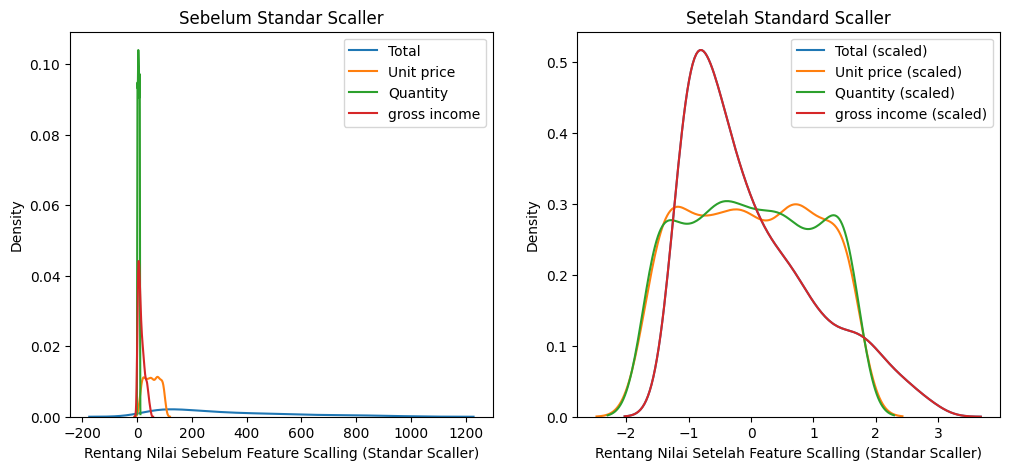

In [ ]:
# kita lihat distribusi dari variabel sebelum standar scaller dan setelah standar scaller
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Standar Scaler
ax1.set_title('Sebelum Standar Scaller')
sns.kdeplot(df_eda['Total'], ax=ax1, label='Total')
sns.kdeplot(df_eda['Unit price'], ax=ax1, label='Unit price')
sns.kdeplot(df_eda['Quantity'], ax=ax1, label='Quantity')
sns.kdeplot(df_eda['gross income'], ax=ax1, label='gross income')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah Standard Scaller')
sns.kdeplot(df_eda['Total_stds'], ax=ax2, label='Total (scaled)')
sns.kdeplot(df_eda['Unit price_stds'], ax=ax2, label='Unit price (scaled)')
sns.kdeplot(df_eda['Quantity_stds'], ax=ax2, label='Quantity (scaled)')
sns.kdeplot(df_eda['gross income_stds'], ax=ax2, label='gross income (scaled)')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Feature Scalling (Standar Scaller)')
ax2.set_xlabel('Rentang Nilai Setelah Feature Scalling (Standar Scaller)')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

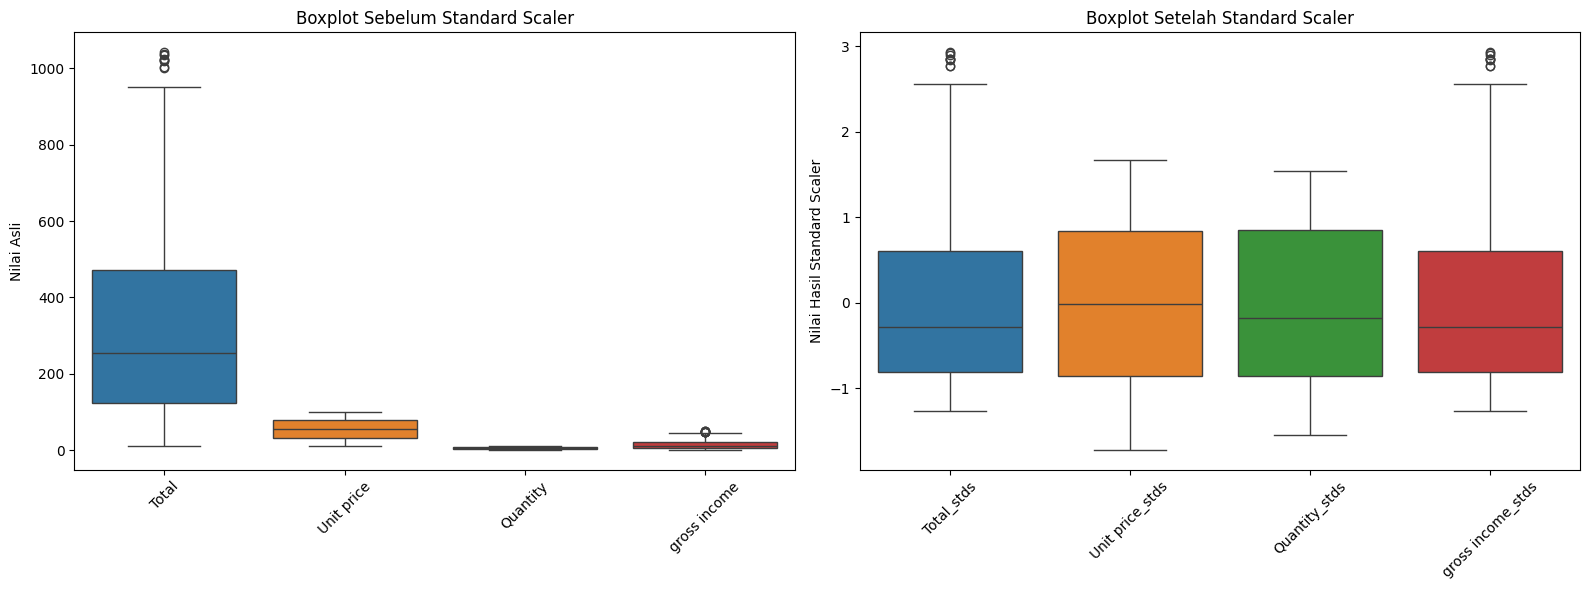

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot sebelum scaling
axes[0].set_title('Boxplot Sebelum Standard Scaler')
sns.boxplot(data=df_eda[['Total', 'Unit price', 'Quantity', 'gross income']], ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Nilai Asli')

# Boxplot setelah scaling
axes[1].set_title('Boxplot Setelah Standard Scaler')
sns.boxplot(data=df_eda[['Total_stds', 'Unit price_stds', 'Quantity_stds', 'gross income_stds']], ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Nilai Hasil Standard Scaler')

plt.tight_layout()
plt.show()



Kolom Total


Sebelum scaling: distribusinya sangat skewed (condong ke kanan) dan memiliki rentang nilai sangat besar hingga >1000.

Insight: Variabel ini punya outlier dan variasi paling tinggi, yang berpotensi mendominasi model jika tidak distandarisasi.

Setelah scaling: distribusinya masih agak skewed, tapi sudah lebih bisa dibandingkan dengan fitur lain.

Kolom Unit Price

menandakan segmentasi produk (murah vs mahal), dan bisa jadi fitur penting untuk klasifikasi pelanggan.
Sebelum scaling: distribusi condong ke kanan (positive skew), menunjukkan lebih banyak produk dijual di harga rendah, dengan sedikit yang sangat mahal.

Insight: Ada produk-produk premium (unit price tinggi), tapi mayoritas penjualan terjadi pada harga menengah ke bawah.

Setelah scaling: distribusinya lebih simetris dan siap digunakan dalam model prediktif.

Kolom Quantity

Quantity’ relatif normal, menunjukkan perilaku pembelian yang stabil

Sebelum scaling: terlihat lebih simetris dibanding fitur lainnya, tapi masih ada variasi.

Insight: Penjualan per transaksi tidak terlalu ekstrem, menunjukkan bahwa jumlah produk yang dibeli relatif stabil.

Setelah scaling: distribusinya menjadi rapi dan relatif normal.



Kolom Gross Income

Sebelum scaling: sangat kecil dibandingkan ‘Total’, dan sedikit skewed.

Insight: Meski pendapatan kotor naik seiring total penjualan, marginnya kecil – bisa jadi menunjukkan keuntungan per transaksi kecil, atau biaya tinggi.

Setelah scaling: distribusi tampak cukup simetris dan paling “rapat” di antara fitur lainnya.

# 3. MinMax Scaller for Exploratory Data Analysis ?
`clue` : lakukan tanpa splitting dataset ke train dan test
- lakukan pada kolom Total, Unit Price, dan tambahkan 2 kolom lainnya
- dan tulis insight dari yang anda dapat dari grafik tersebut

In [ ]:
# Kolom-kolom yang ingin dinormalisasi
columns_to_minmax = ['Total', 'Unit price', 'Quantity', 'gross income']

# Inisialisasi MinMaxScaler
minmax = MinMaxScaler()

In [ ]:
# Menerapkan normalisasi Min-Max ke dataframe
df_eda[['Total_minmax', 'Unit price_minmax','Quantity_minmax', 'gross income_minmax']] = minmax.fit_transform(df_eda[columns_to_minmax])

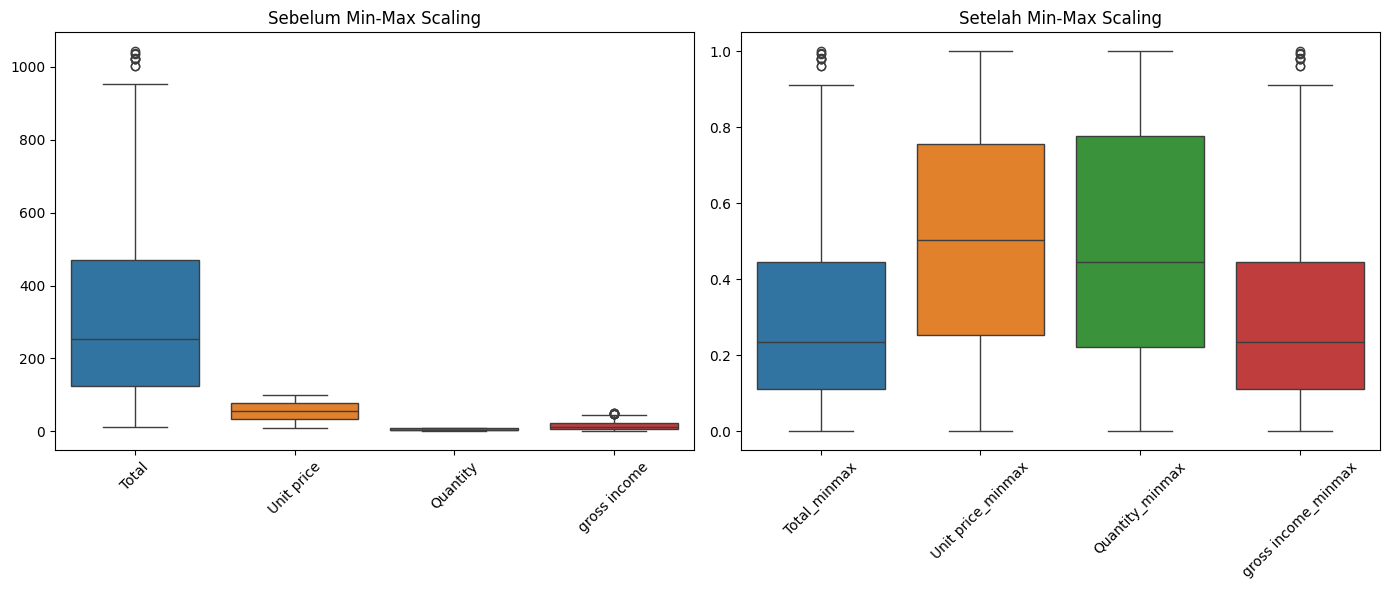

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot sebelum scaling
axes[0].set_title('Sebelum Min-Max Scaling')
sns.boxplot(data=df_eda[['Total', 'Unit price', 'Quantity', 'gross income']], ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)

# Boxplot setelah scaling
axes[1].set_title('Setelah Min-Max Scaling')
sns.boxplot(data=df_eda[['Total_minmax', 'Unit price_minmax', 'Quantity_minmax', 'gross income_minmax']], ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Sebelum Minmax Scalling**

Total:

Median penjualan sekitar 250.

Terdapat banyak outlier di atas 800 bahkan hingga 1000+.

Sebaran data cukup lebar → menandakan variasi tinggi antar transaksi.

Insight: Produk dengan harga tinggi menyebabkan fluktuasi besar.

Unit Price:

Nilai berkisar antara ~10 hingga ~100.

Distribusi cukup merata namun ada skew ke atas (harga tinggi sedikit tapi ada).

Insight: Ada sebagian kecil produk premium.

Quantity:

Nilai sangat rendah secara absolut, dengan mayoritas transaksi dalam jumlah kecil.

Hampir tidak ada outlier, distribusi normal.

Insight: Pembelian massal sangat jarang, kebanyakan pelanggan membeli sedikit.

Gross Income:

Skala kecil (~0–50), dengan beberapa outlier.

Insight: Margin keuntungan kecil dibanding total transaksi. Potensi efisiensi atau perbaikan pricing.

**Setelah Minmax Scalling**

Semua nilai fitur diubah ke rentang 0–1.

Outlier tetap terlihat (contoh pada Total_minmax dan gross income_minmax) meski dalam skala 0–1.

Distribusi dan bentuk boxplot tetap sama, karena scaling tidak mengubah bentuk distribusi—hanya mengatur ulang rentang nilai.

Total dan Gross Income memiliki outlier → butuh perhatian khusus (mungkin perlu transformasi lanjutan atau penanganan outlier).

Quantity cenderung stabil → bisa digunakan sebagai indikator loyalitas (misal: sering beli walau sedikit).

Unit Price menunjukkan segmentasi harga produk yang cukup jelas → cocok untuk segmentasi produk.

Gross Income tetap rendah setelah scaling → kemungkinan strategi harga saat ini terlalu agresif atau margin terlalu kecil.